CURR DIR: /home/mmilenkovic/git/muzero-ultimate-tic-tac-toe/tmp
FILE PATH: /home/mmilenkovic/git/muzero-ultimate-tic-tac-toe/results/ultimate_tictactoe/profiling_data.json


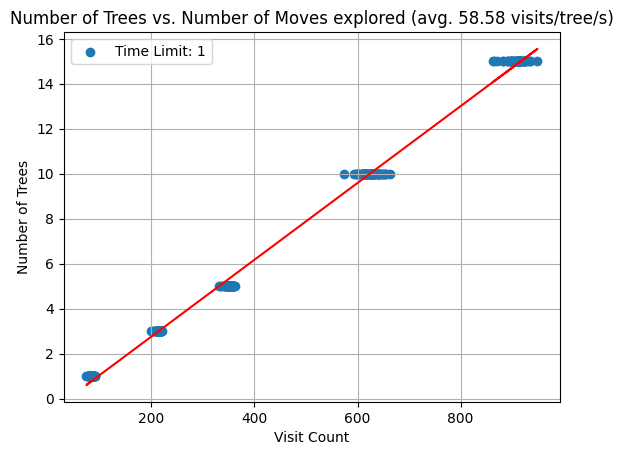

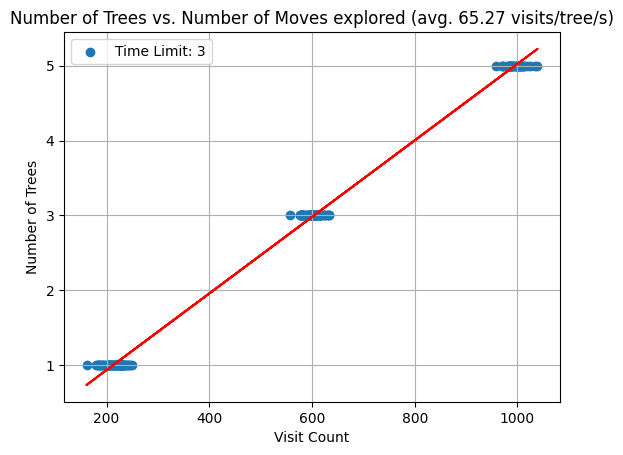

In [13]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Relative path to the JSON file
relative_path = '../results/ultimate_tictactoe/profiling_data.json'
current_dir = os.getcwd()
# Get the absolute path
file_path = os.path.abspath(os.path.join(current_dir, relative_path))
print("CURR DIR:",current_dir)
print("FILE PATH:",file_path)
# Load data from JSON file
with open(file_path, 'r') as f:
    data = json.load(f)

# Separate data by time limit
time_limits = {}
for entry in data:
    time_limit = entry['time_limit']
    if time_limit not in time_limits:
        time_limits[time_limit] = {'visit_count': [], 'num_trees': []}
    time_limits[time_limit]['visit_count'].append(entry['visit_count'])
    time_limits[time_limit]['num_trees'].append(entry['num_trees'])

# Plot scatter plots and linear regression for each time limit
for time_limit, values in time_limits.items():
    visit_count = values['visit_count']
    num_trees = values['num_trees']

    # Convert to numpy arrays for regression
    visit_count = np.array(visit_count).reshape(-1, 1)
    num_trees = np.array(num_trees)

    # Scatter plot
    plt.scatter(visit_count, num_trees, label=f'Time Limit: {time_limit}')

    # Linear regression
    model = LinearRegression()
    model.fit(visit_count, num_trees)
    predicted_num_trees = model.predict(visit_count)
    # Get the coefficient of direction (slope) and intercept
    coefficient_of_direction = model.coef_[0]
    intercept = model.intercept_

    # Construct the formula for the regression line
    formula = f'avg. {1.0/(coefficient_of_direction*time_limit):.2f} visits/tree/s'

    # 
    # Plot the regression line
    plt.plot(visit_count, predicted_num_trees, color='red', linestyle='-')

    plt.xlabel('Visit Count')
    plt.ylabel('Number of Trees')
    plt.title(f'Number of Trees vs. Number of Moves explored ({formula})')
    plt.legend()
    plt.grid(True)
    plt.show()
